# Reddit Data Anaylsis

## The goal of this anaylsis is to do the following:
### Identify the relationship between budget and worldwide box office sales
### Use  Data Visulations and calculations to gain insight into how strongly these features correlate if they do

## 1. Importing Modules and Dataframe

In [1]:
import pandas as pd # Importing the necessary libraries
import numpy as np

In [2]:
df=pd.read_csv('Reddit_data.csv') # reading dataframe 
df.head() #and checking first 5 rows

,Title,Domestic Gross (Weekend),Worldwide Gross (Cume),Number of Weeks since Release,Budget
0,Aladdin (2019),"112,700,000","233,700,000",1.0,183M
1,John Wick: Chapter 3 - Parabellum,"57,025,000","149,225,000",1.0,55M
2,Avengers: Endgame,"63,054,000","2,485,499,739",3.0,356M
3,Avengers: Endgame,"145,804,000","2,188,698,638",2.0,356M
4,Avengers: Endgame,"350,000,000","1,209,000,000",1.0,356M


## 2. Cleaning and Inspecting the DataFrame

In [3]:
df=df.sort_values("Number of Weeks since Release",ascending=False)
df.head() #First I will sort the dataframe by 
#'number of weeks since release' since there are duplicate movies in this dataframe

,Title,Domestic Gross (Weekend),Worldwide Gross (Cume),Number of Weeks since Release,Budget
195,Alita: Battle Angel,"7,000,000","350,453,163",16.0,170M
187,Long Shot,"10,025,000","13,325,000",9.0,40M
50,Captain Marvel,"8,051,000","1,110,180,047",8.0,152M
199,Miss Bala,"6,700,000","6,700,000",8.0,15M
143,Captain Marvel,"9,100,000","1,089,526,133",7.0,152M


In [4]:
df.drop_duplicates(subset="Title",keep='first',inplace=True)
df.head() #Now I will drop all duplicates after the first occurance of a movie
         #The reasoning for this is because since the movies were sorted above, we will be left
        #with only the most recent numbers for each movie

,Title,Domestic Gross (Weekend),Worldwide Gross (Cume),Number of Weeks since Release,Budget
195,Alita: Battle Angel,"7,000,000","350,453,163",16.0,170M
187,Long Shot,"10,025,000","13,325,000",9.0,40M
50,Captain Marvel,"8,051,000","1,110,180,047",8.0,152M
199,Miss Bala,"6,700,000","6,700,000",8.0,15M
153,Aquaman,"4,785,000","1,106,972,240",7.0,200M


In [6]:
df.shape #Inspecting whats remaining in the dataframe

(86, 5)

In [5]:
df.info() #Checking for dtypes and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 195 to 0
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          86 non-null     object 
 1   Domestic Gross (Weekend)       86 non-null     object 
 2   Worldwide Gross (Cume)         86 non-null     object 
 3   Number of Weeks since Release  86 non-null     float64
 4   Budget                         84 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [7]:
df.dropna(axis=0,inplace=True) #dropping the two rows with null values
df.Budget.isna().any() #confirming they were dropped 

False

In [8]:
df.Budget=df.Budget.str.replace('M','')
df.Budget=df.Budget.astype('float') # the budget column is a string with 'M' at the end so these commands fix that
print(df.Budget.dtype) #confirming the values are floats
df.Budget.isna().any() #confirming no null values left

float64


False

In [9]:
df['Worldwide Gross (Cume)']=df['Worldwide Gross (Cume)'].apply(lambda x:x.replace(',','')) #getting rid of commas
df['Worldwide Gross (Cume)']=df['Worldwide Gross (Cume)'].astype('float') #making values floats
df['Worldwide Gross (Cume)'].dtype #confirming values are floats

dtype('float64')

In [10]:
df.describe() #basic stats info about Sales and Budget

,Worldwide Gross (Cume),Number of Weeks since Release,Budget
count,8.400000e+01,84.000000,84.000000
mean,2.027879e+08,3.309524,74.761905
std,3.643044e+08,2.348936,69.482748
min,6.700000e+06,1.000000,5.000000
25%,1.948750e+07,1.750000,24.750000
50%,6.810817e+07,3.000000,50.000000
75%,2.313267e+08,4.000000,105.000000
max,2.682932e+09,16.000000,356.000000


## 3. Exploratory Data Analysis

In [11]:
df.sort_values('Budget',ascending=False)['Budget'].head(10) 
#Finding the top 10 Movies in terms of Budget                                    

92     356.0
183    300.0
179    200.0
178    200.0
153    200.0
207    200.0
0      183.0
126    178.0
159    175.0
134    170.0
Name: Budget, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [13]:
y_1=df.sort_values('Budget',ascending=False)['Budget'].head(10) #collecting Budget numbers for movies with 10 highest

In [14]:
x_1=df.sort_values('Budget',ascending=False)['Title'].head(10)#collecting Movie titles for the 10 movies with highest budgets
x_1 #Movie Names

92                               Avengers: Endgame
183                        Solo: A Star Wars Story
179                                  Incredibles 2
178                           Ant-Man and the Wasp
153                                        Aquaman
207    Fantastic Beasts: The Crimes of Grindelwald
0                                   Aladdin (2019)
126                  Mission: Impossible - Fallout
159                      Ralph Breaks the Internet
134                 Jurassic World: Fallen Kingdom
Name: Title, dtype: object

In [15]:
y_2=df.sort_values('Budget',ascending=True)['Budget'].head(10) #collecting Budget numbers for movies with 10 lowest budgets

In [16]:
x_2=df.sort_values('Budget',ascending=True)['Title'].head(10) #collecting Movies titles for movies with 10 lowest budgets

In [17]:
y_3=df.sort_values('Budget',ascending=False)['Worldwide Gross (Cume)'].head(10) #collecting Worldwide sales for 10 highest

In [18]:
y_4=df.sort_values('Budget',ascending=True)['Worldwide Gross (Cume)'].head(10) #collecting wordwides sales for 10 lowest

## 4. Feature Engineering

### Now I will create a value column which calculates how much value a movie generates. In other words, it will be a proportion of sales to budget.

In [31]:
df['Value']=df['Worldwide Gross (Cume)']/df.Budget

In [35]:
df.loc[:,['Title','Budget','Worldwide Gross (Cume)','Value']].sort_values('Value',ascending=False).head(10) 
#top 10 movies in terms of value

,Title,Budget,Worldwide Gross (Cume),Value
27,Halloween (2018),10.0,1.722984e+08,1.722984e+07
145,Us,20.0,2.165960e+08,1.082980e+07
200,Dragon Ball Super: Broly,8.5,8.692758e+07,1.022677e+07
146,Five Feet Apart,5.0,5.067560e+07,1.013512e+07
15,Glass,20.0,1.989551e+08,9.947755e+06
188,The Curse of La Llorona,9.0,8.698430e+07,9.664922e+06
164,A Star is Born (2018),36.0,2.939346e+08,8.164849e+06
78,The Nun,30.0,2.286763e+08,7.622544e+06
92,Avengers: Endgame,356.0,2.682932e+09,7.536325e+06
116,Bohemian Rhapsody,52.0,3.843305e+08,7.390971e+06


## As you can see above the top 10 value movies are quite different from the top 10 revenue.
## So in terms of maximizing profit to cost, these movies' budgets should be considered.

Text(0.5, 1.0, 'Value of Top 10 Value Films')

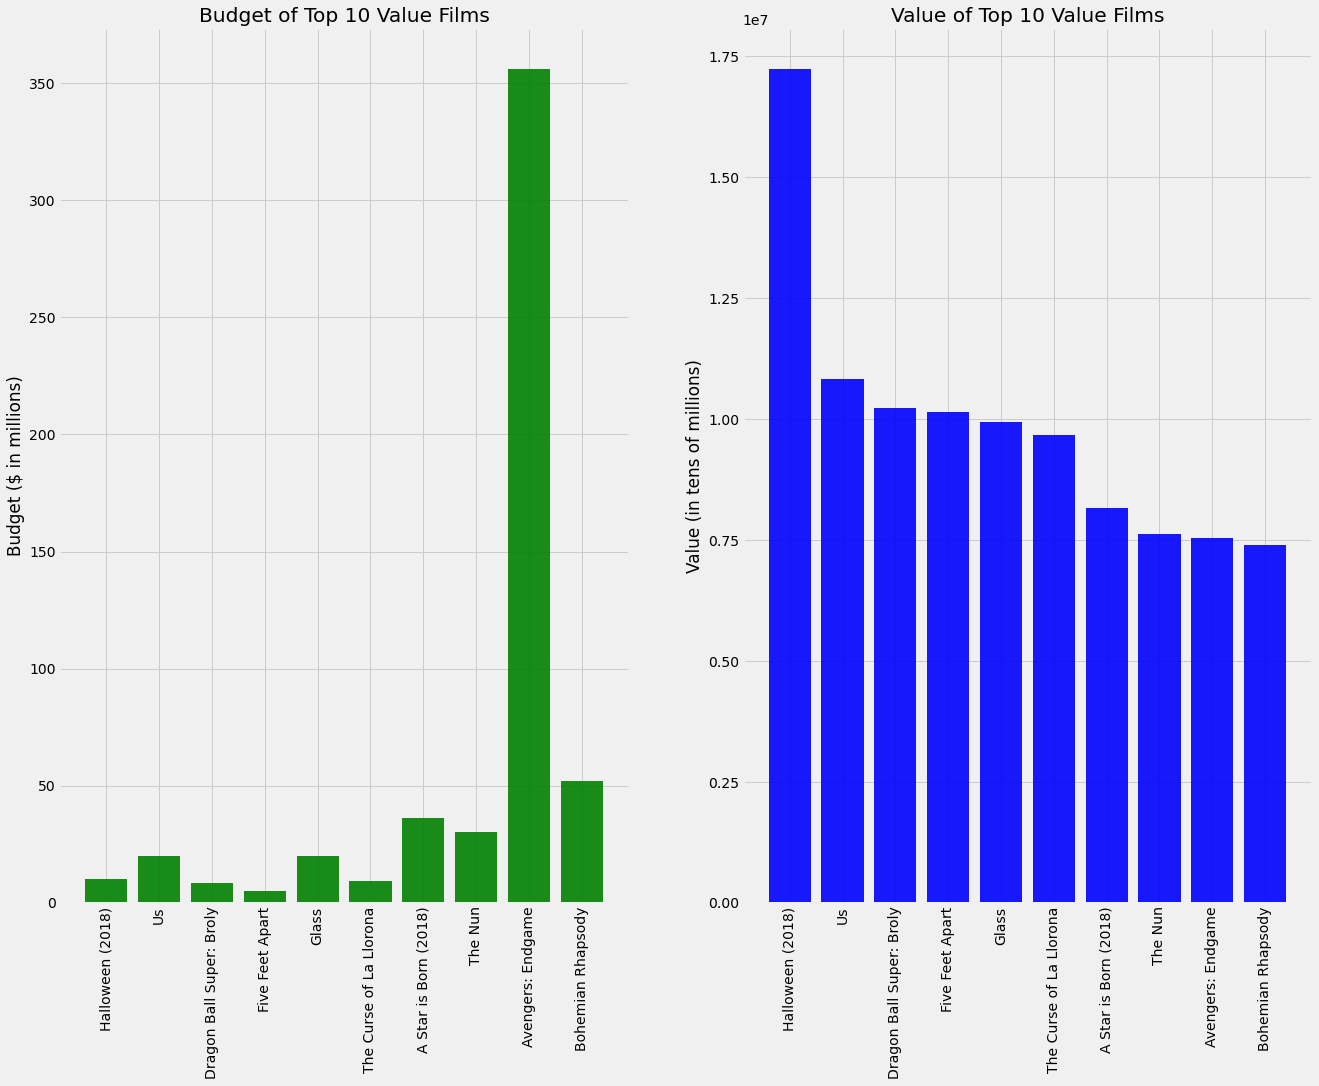

In [57]:
b1=df.loc[:,['Budget','Value']].sort_values('Value',ascending=False).head(10)['Budget']
v1=df.loc[:,['Budget','Value']].sort_values('Value',ascending=False).head(10)['Value']
t1=df.loc[:,['Budget','Value','Title']].sort_values('Value',ascending=False).head(10)['Title']
fig,ax=plt.subplots(1,2,figsize=(20,15))
ax[0].bar(t1,b1,color='green',alpha=.9)
ax[0].set_xticklabels(labels=t1,rotation=90)
ax[0].set_ylabel('Budget ($ in millions)')
ax[0].set_title('Budget of Top 10 Value Films')
ax[1].bar(t1,v1,color='blue',alpha=.9)
ax[1].set_xticklabels(labels=t1,rotation=90)
ax[1].set_ylabel('Value (in tens of millions)')
ax[1].set_title('Value of Top 10 Value Films')#Graphing top Value Movies vs Budget and vs Value

## 5. Data Visualizations

## Before I see the 10 highest and 10 lowest Budget films compared to their sales, I'll look at  their value.

In [58]:
x_1 #top 10 films in terms of budget

92                               Avengers: Endgame
183                        Solo: A Star Wars Story
179                                  Incredibles 2
178                           Ant-Man and the Wasp
153                                        Aquaman
207    Fantastic Beasts: The Crimes of Grindelwald
0                                   Aladdin (2019)
126                  Mission: Impossible - Fallout
159                      Ralph Breaks the Internet
134                 Jurassic World: Fallen Kingdom
Name: Title, dtype: object

In [61]:
v_1=df.loc[:,['Budget','Value']].sort_values('Budget',ascending=False).head(10)['Value']
v_1 #value of 10 highest budget movies

92     7.536325e+06
183    1.131817e+06
179    4.284592e+06
178    1.767621e+06
153    5.534861e+06
207    1.078711e+06
0      1.277049e+06
126    3.635093e+06
159    1.629514e+06
134    6.227310e+06
Name: Value, dtype: float64

Text(0.5, 1.0, 'The Value for the 10 Highest Budget Movies')

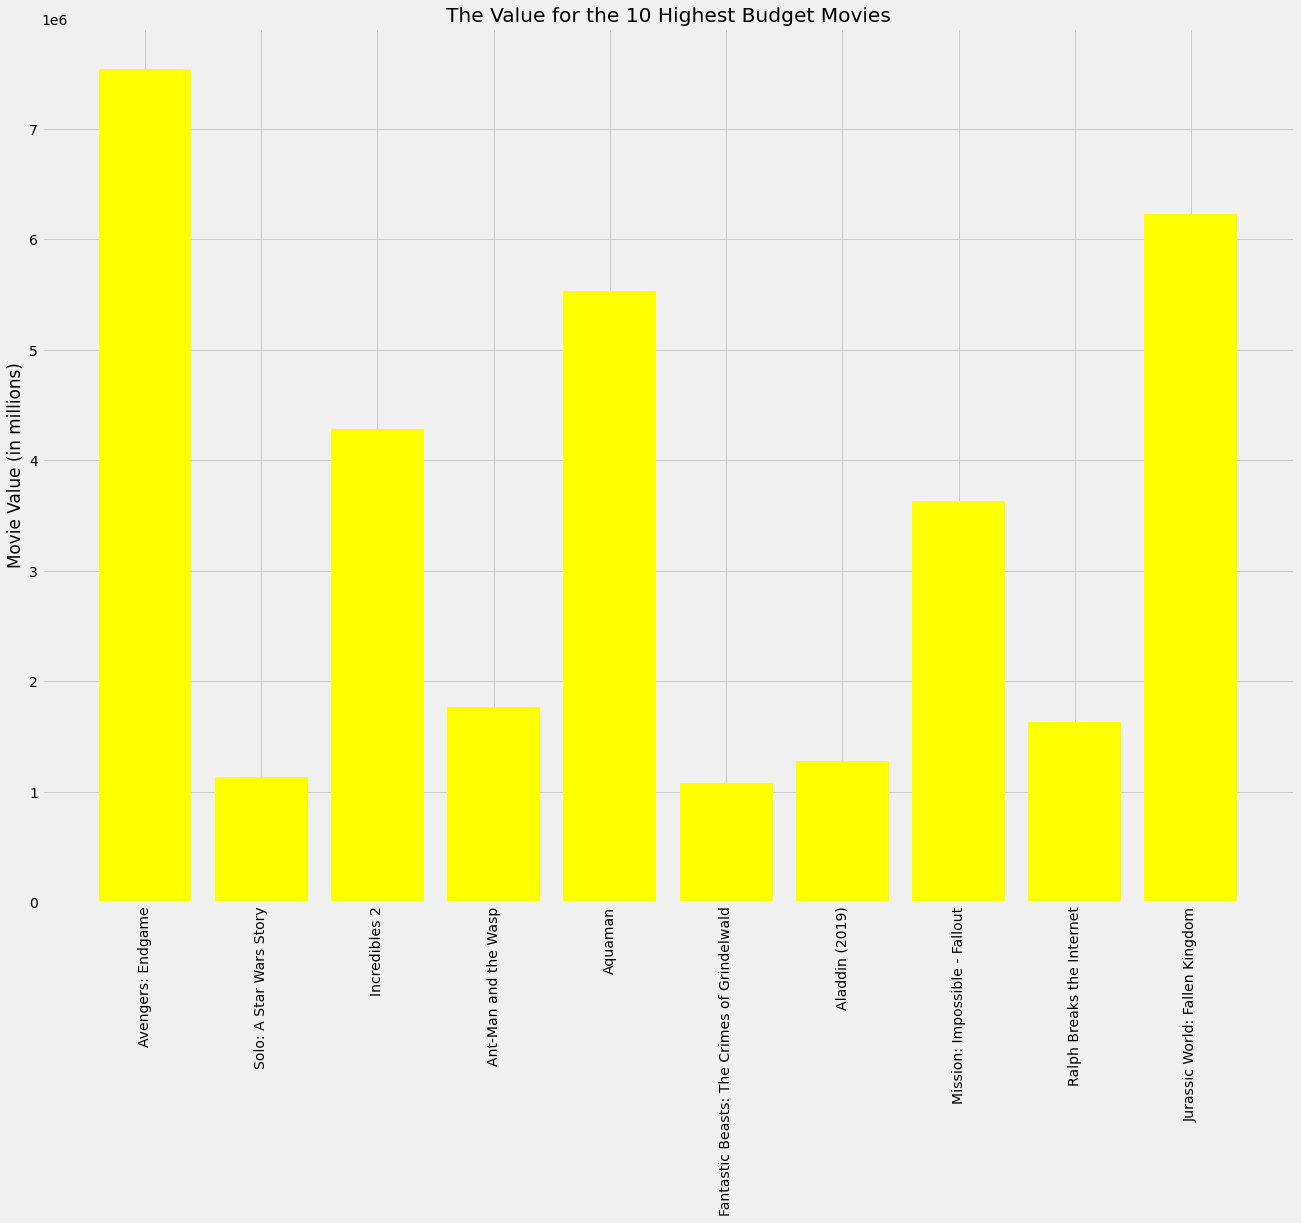

In [63]:
fig,ax=plt.subplots(figsize=(20,15))
ax.bar(x_1,v_1,color='yellow')
ax.set_xticklabels(labels=x_1,rotation=90)
ax.set_ylabel('Movie Value (in millions)')
ax.set_title('The Value for the 10 Highest Budget Movies')

## Even though only Avengers made the top 10 values list, Please note that all of these 10 Movies at least break even with many doing well above that.

Text(0.5, 1.0, 'The 10 Highest Budget Movies and Worldwide Box Office Sales')

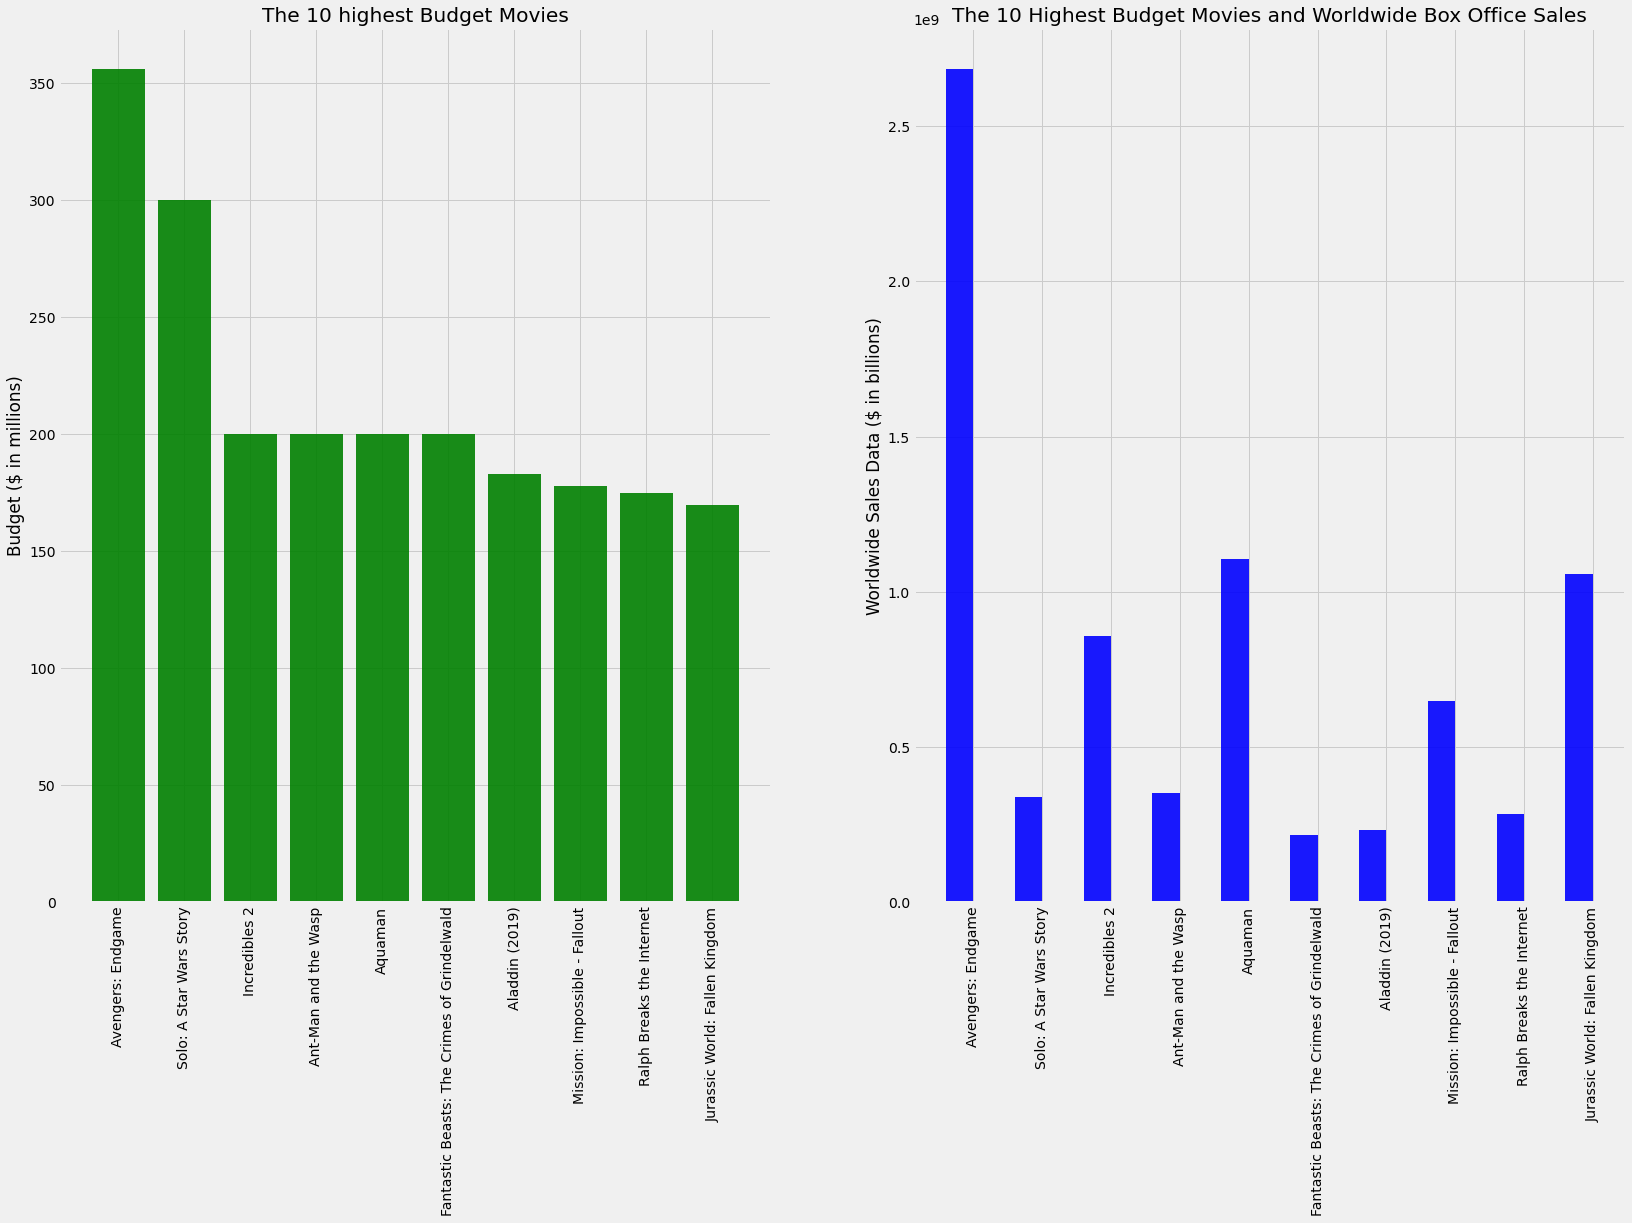

In [28]:
fig,ax=plt.subplots(1,2,figsize=(25,15))
ax[0].bar(x_1,y_1,color='green',alpha=.9,label='Movie Budget')
ax[0].set_xticklabels(labels=x_1,rotation=90)
ax[0].set_ylabel('Budget ($ in millions)')
ax[0].set_title('The 10 highest Budget Movies')
ax[1].bar(x_1,y_3,color='blue',alpha=.9, label='Worldwide Box Office Sales',width=-.4,align='edge')
ax[1].set_ylabel('Worldwide Sales Data ($ in billions)')
ax[1].set_xticklabels(labels=x_1,rotation=90)
ax[1].set_title('The 10 Highest Budget Movies and Worldwide Box Office Sales')

Text(0.5, 1.0, 'The 10 Highest Budget Movies and Worldwide Box Office Sales')

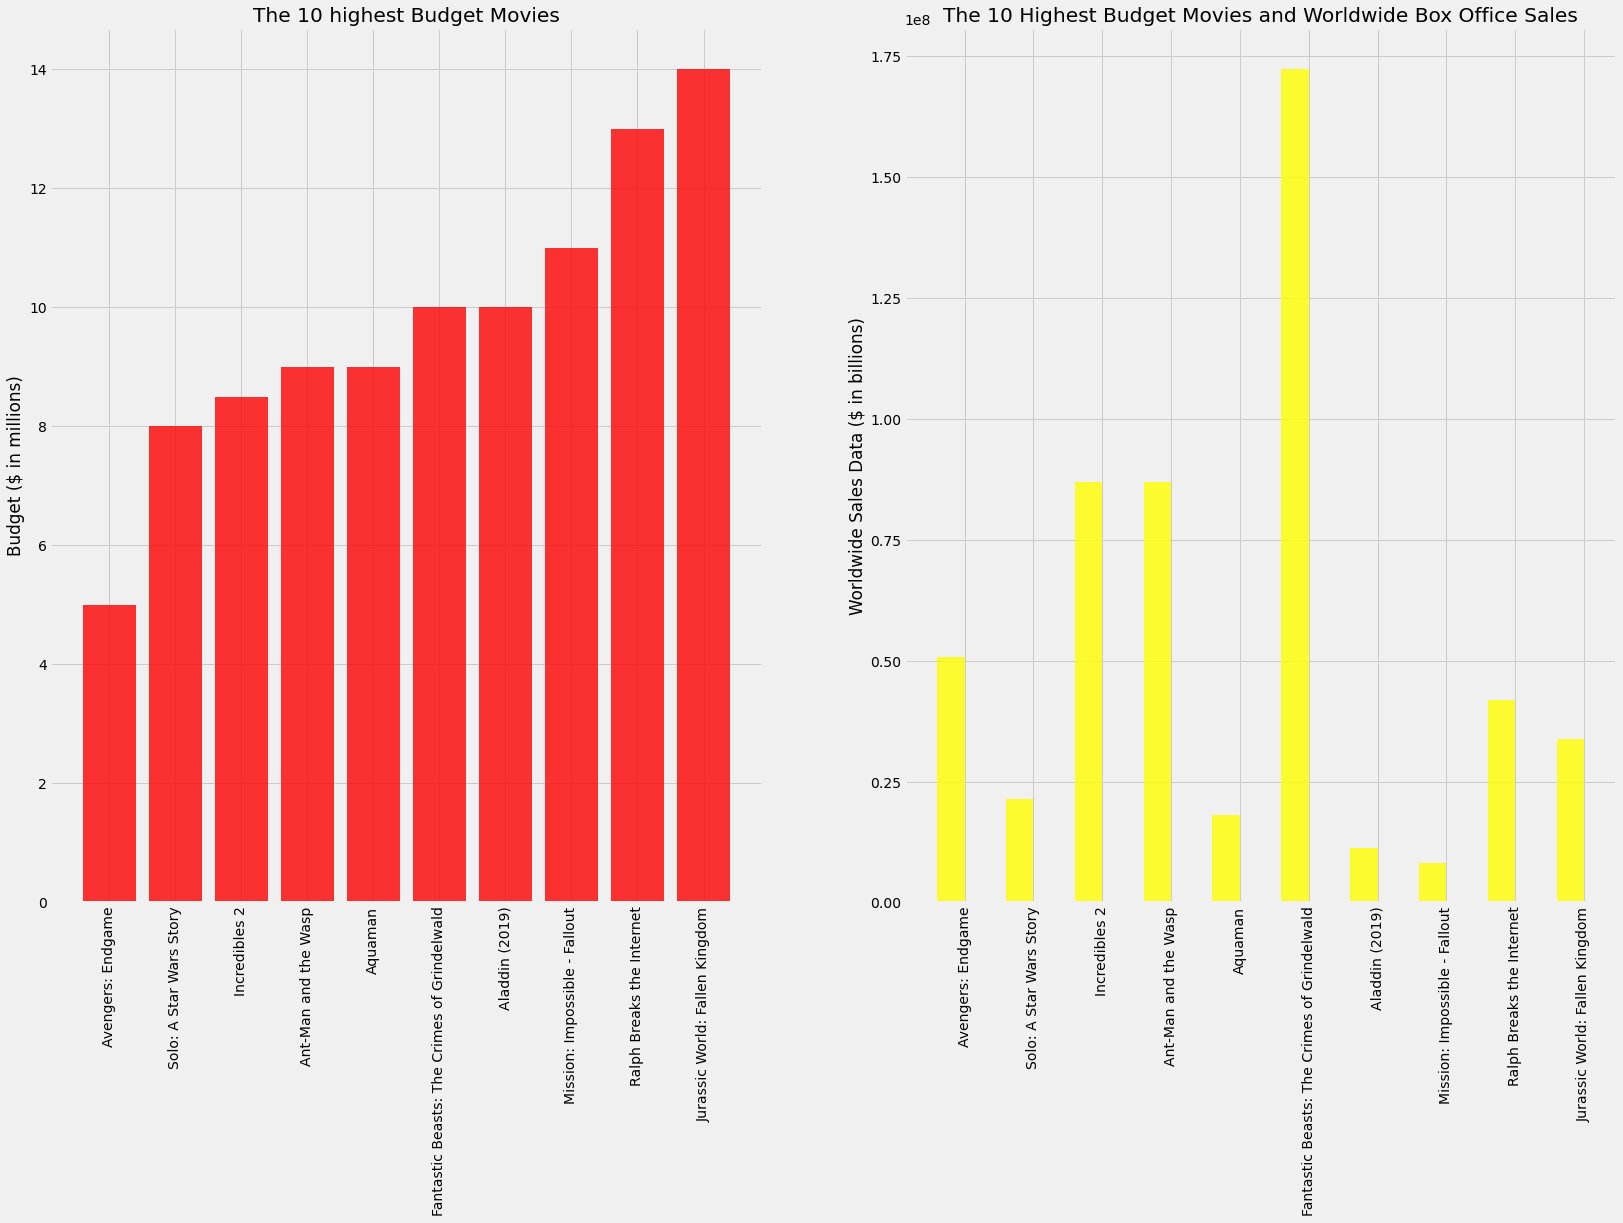

In [30]:
fig,ax=plt.subplots(1,2,figsize=(25,15))
ax[0].bar(x_2,y_2,color='red',alpha=.8,label='Movie Budget')
ax[0].set_xticklabels(labels=x_1,rotation=90)
ax[0].set_ylabel('Budget ($ in millions)')
ax[0].set_title('The 10 highest Budget Movies')
ax[1].bar(x_2,y_4,color='yellow',alpha=.8, label='Worldwide Box Office Sales',width=-.4,align='edge')
ax[1].set_ylabel('Worldwide Sales Data ($ in billions)')
ax[1].set_xticklabels(labels=x_1,rotation=90)
ax[1].set_title('The 10 Highest Budget Movies and Worldwide Box Office Sales')
#lines,labels=ax.get_legend_handles_labels()
#lines2,labels2=ax1.get_legend_handles_labels()
#ax1.legend(lines+lines2,labels+labels2,loc=0)
#Graphing 10 Movies with highest budgets and their sales

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
ax.bar(x_2,y_2,color='red',alpha=.9,label='Budget',width=.4,align='edge')
ax.set_xticklabels(labels=x_2,rotation=90)
ax.set_ylabel('Budget ($ in millions)')
ax.set_title('The 10 Movies with the lowest Budgets and their Worldwide Box Office Sales')
ax1=ax.twinx()
ax1.bar(x_2,y_4,color='yellow',alpha=.9,label='Worldwide Box Office Sales',width=-.4,align='edge')
ax1.set_ylabel('Worldwide Sales Data ($ in hundreds of millions)')
lines,labels=ax.get_legend_handles_labels()
lines2,labels2=ax1.get_legend_handles_labels()
ax1.legend(lines+lines2,labels+labels2,loc='upper left')
#Graphing 10 cheapest movies in terms of budget with worldwide sales

## The Top 10 Movie Budgets graph  suggests there is a positive relationship between Budget and Worldwide Sales. In other words, you can expect an increase in box office sales as you spend more money which intuitively makes sense.

## However, The Bottom 10 Movies Budgets show that a low budget movie can still be profitable . Clearly, These visualizations shows that the profitabilty of a movie is affected by budget but many other criteria are important as well.

## 6. Covariance and  Pearson Correlation Calculations

## -The goal now is to use the covariance and pearson formulas to quantitativly measure how correlated and related Budget and World Box Office sales are.

In [ ]:
import numpy as np
Cov_top_10_budgets=np.cov(y_1,y_3) #The covariance is 3 *10^10 so there seems to be a 
Cov_top_10_budgets              #possibly strong positive relationship

In [ ]:
Cor_top_10_budgets=np.corrcoef(y_1,y_3)
Cor_top_10_budgets #A Pearson coefficent of .65
                   #suggests there is a somewhat strong correlation between budget and worldwide sales

In [ ]:
Cov_bottom_10_budgets=np.cov(y_2,y_4)
Cov_bottom_10_budgets  #There seems to be a negative relationship for the lowest 10 movies

In [ ]:
Cor_bottom_10_budgets=np.corrcoef(y_2,y_4)
Cor_bottom_10_budgets #So they are correlated negativly but only slightly. A .11 coefficent is almost neglible.

## 7. Scatter Plot of Budget vs World Box Office Sales

In [ ]:
m,b=np.polyfit(df.Budget,df['Worldwide Gross (Cume)'],1)#first I'll make a regression line from the data
Y=m*df['Budget']+b
print(m,b) #slope of regression and y-intercept

In [ ]:
plt.scatter(df.Budget,df['Worldwide Gross (Cume)'],label='Worldwide Box Office')#Now I'll see if visually the relationship looks strong
plt.plot(df['Budget'],Y,'r-',label='predicted sales')
plt.xlabel('Movie Budget ($ millions)',fontsize=10)
plt.ylabel('WorldWide Sales ($ billions)',fontsize=10)
plt.title('Comparing Box Office Sales to Movie Budgets',fontsize=10)
plt.legend()

### The scatter suggests there is a somewhat linear positive relationship.

In [ ]:
cov_general=np.cov(df.Budget,df['Worldwide Gross (Cume)'])
cor_general=np.corrcoef(df.Budget,df['Worldwide Gross (Cume)']) #Now I'll calculate
                                                                #the overall covariance and coefficent

In [ ]:
cov_general #covariance over entire series

In [ ]:
cor_general #Pearson coefficent for entire series

## The covariance between Budget and Gross Worldwide Sales columns suggest there is a positive relationship. (possibly strong)

## The Pearson coefficent of .7225 suggests that in general there is a strong positive correlation between Budget and sucess at the box office. 

## However as we saw with the Pearson coefficent for the bottom 10 movies, this strong correlation is not true in all cases. Since we did get a high coefficent for the top 10 movies though, it is my conclusion that budget is an important feature to consider to obtain large profits.

## Also, Please note from the feature engineering section, that only Avengers was in the top 10 Movies by value. So if Microsoft's goal is just to maximize profits relative to budget, than a budget of 50 million and prioritizing other criteria is reasonable.